In [125]:
import numpy as np
from math import pi
from gdshelpers.geometry.chip import Cell
from gdshelpers.parts.waveguide import Waveguide
from gdshelpers.parts.coupler import GratingCoupler
from gdshelpers.parts.resonator import RingResonator
from gdshelpers.parts.splitter import Splitter
from gdshelpers.layout import GridLayout
from gdshelpers.parts.marker import CrossMarker
from gdshelpers.parts.marker import SquareMarker
from gdshelpers.helpers.positive_resist import convert_to_positive_resist
from gdshelpers.parts.port import Port
from shapely.geometry import Polygon
from shapely.affinity import scale
from shapely.affinity import translate
from shapely.affinity import rotate
from gdshelpers.geometry import geometric_union
from gdshelpers.helpers.under_etching import create_holes_for_under_etching
from gdshelpers.geometry.ebl_frame_generators import raith_marker_frame
from gdshelpers.parts.text import Text
from shapely.geometry import Point
import importlib
import aco_components1
importlib.reload(aco_components1)

<module 'aco_components1' from '/Users/haoqindeng/Desktop/MoLiGroup/IDT_gds/aco_components1.py'>

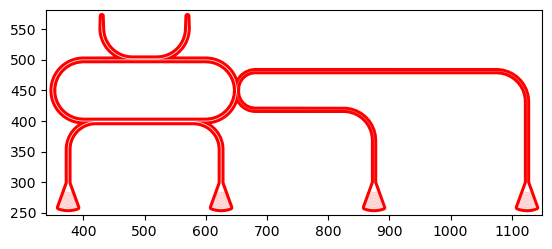

In [126]:
cell = Cell('racetrack')
cell = aco_components1.make_racetrack_ring_omr(cell, upper_width=1.2, lower_width=1.2, racetrack_width=1.2, racetrack_len=200, lower_coupling_len=160, right_coupling_len=2,
                                          upper_gap=0.085, lower_gap=0.07, offset=(500, 400))
cell.show()
# cell.save('test_rc.gds')

In [101]:
cell.save('test_rc.gds')

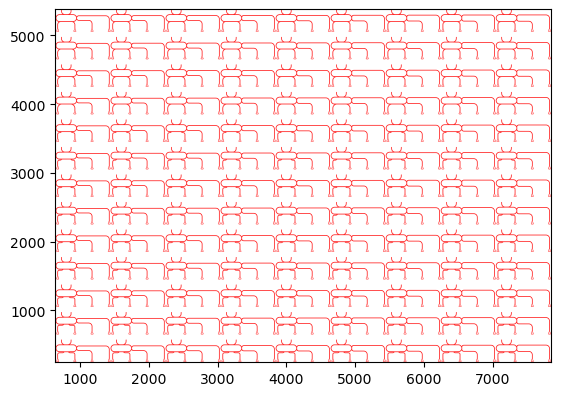

In [127]:
cell = Cell('racetrack')
pos_x = 0
pos_y = 0
# te0_coupling_len_list = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

lower_coupling_len_list = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
right_coupling_len_list = [4, 6, 8, 10, 12, 14, 16, 18, 20]

# lower_coupling_len_list = [40, 60]
# right_coupling_len_list = [4, 6, 8]
# te0_coupling_len_list = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for lower_coupling_len in lower_coupling_len_list:
    pos_y += 400
    pos_x = 0
    for right_coupling_len in right_coupling_len_list:
        pos_x += 800
        cell = aco_components1.make_racetrack_ring_omr(cell, upper_width=1.2, lower_width=1.2, racetrack_width=1.2, racetrack_len=200, lower_coupling_len=lower_coupling_len, right_coupling_len=right_coupling_len,
                                          upper_gap=0.085, lower_gap=0.07, offset=(pos_x, pos_y))

cell.show()
# pos_x = 350
# pos_y = 0
# te0_coupling_len_list = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
# for te0_coupling_len in te0_coupling_len_list:
#     pos_y += 300
#     cell = aco_components1.make_racetrack_ring(cell, te0_width=1.2, te2_width=1.2, racetrack_width=1.2,
#                                               te0_coupling_len=te0_coupling_len, te2_coupling_len=te0_coupling_len, racetrack_len=200,
#                                           te0_gap=0.09, te2_gap=0.09, offset=(pos_x, pos_y))
# cell.show()
# cell.save('IDT_library_GDS/rc_col1.gds')

In [128]:
cell.save('SOS_Char/racetrack_v1.3.gds')

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/gdshelpers/geometry/shapely_adapter.py:116: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  poly._gdsh_n_points = len(poly.exterior.coords) + sum([len(shapely.geometry.LinearRing(x).coords) for x


In [228]:
cell = Cell('racetrack')
pos_x = 0
pos_y = 0
# te0_coupling_len_list = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

te0_coupling_len_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# te0_coupling_len_list = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for te0_coupling_len in te0_coupling_len_list:
    pos_y += 350
    cell = aco_components.make_racetrack_ring(cell, te0_width=1.2, te2_width=1.2, racetrack_width=1.2,
                                              te0_coupling_len=te0_coupling_len, te2_coupling_len=te0_coupling_len, racetrack_len=200,
                                          te0_gap=0.08, te2_gap=0.07, offset=(pos_x, pos_y))
# cell.show()
cell.save('IDT_library_GDS/racetrack_te0_gap=0.07_col2.gds')

In [229]:
import string
coupler1_params = {
    'width': 0.39,
    'full_opening_angle': np.deg2rad(40),  # 40
    'grating_period': 0.7,
    'grating_ff': 0.85,  # minigap = 30nm
    # 'ap_max_ff':0.85,
    'ap_max_ff':0.99,
    'n_gratings': 20,  # 20
    'taper_length': 16,  # 16um
    'n_ap_gratings': 20,  # 20
}
def te0_te0_directional_coupler_straight(start_x: int, start_y: int, cell: Cell, coupler_params: dict, 
                            gap: float, coupling_len: float, te0_wg_width: float, te2_wg_width: float, radius=60,
                            ring_r = 50, ring_coupling_len = 20, ring_gap = 0.07, inversion=False,
                            cell_name = 'dummy', measure_offset = 50):

    cell = Cell(cell_name)
    # coupler1_params['width'] = te0_wg_width
    gap01 = gap + te0_wg_width/2 + te2_wg_width/2
    gc1 = GratingCoupler.make_traditional_coupler(origin=(start_x + 250, start_y), **coupler_params)
    wg1 = Waveguide.make_at_port(gc1.port)
    wg1.add_straight_segment(length=measure_offset)
    wg1.add_arc(radius=radius, final_angle=0)
    wg1.add_straight_segment(length=coupling_len)
    pos1 = wg1.port.origin
    wg1.add_arc(radius=radius, final_angle=(-pi/2))
    wg1.add_straight_segment(length=30)
    wg1.add_straight_segment(length=20, final_width=0.0000001)

    # gc2 = GratingCoupler.make_traditional_coupler(origin=(start_x + 750, start_y), **coupler_params)
    # wg2 = Waveguide.make_at_port(gc2.port)
    # wg2.add_straight_segment(length=measure_offset)
    # wg2.add_arc(radius=radius, final_angle=pi)
    # wg2.add_straight_segment(length=coupling_len)
    # wg2.add_arc(radius=radius, final_angle=(-pi/2))
    # wg2.add_straight_segment(length=30)
    # wg2.add_straight_segment(length=20, final_width=0.0000001)

    offset_len = measure_offset + gap01
    gc0 = GratingCoupler.make_traditional_coupler(origin=(start_x, start_y), **coupler_params)
    wg0 = Waveguide.make_at_port(gc0.port)
    wg0.add_straight_segment(length=offset_len)
    wg0.add_arc(radius=radius, final_angle=0)
    wg0.add_straight_segment(length=10)
    wg0.add_straight_segment(length=30, final_width=te2_wg_width)
    wg0.add_straight_segment(length=100)


    r_out = ring_r + te2_wg_width + gap
    alpha = 0.5 * ring_coupling_len / r_out
    print('alpha: ', alpha)

    # wg0.add_arc(radius=60, final_angle=(-alpha))
    # wg0.add_arc(radius=r_out, final_angle=0)
    pos2 = wg0.port.origin
    ring_pos_x = pos2[0]
    ring_pos_y = pos2[1] + te2_wg_width + ring_gap
    # # print(pos2)
    # # print(gap)
    # wg0.add_arc(radius=r_out, final_angle=alpha)
    # wg0.add_arc(radius=radius, final_angle=0)
    wg0.add_straight_segment(length=ring_coupling_len)
    wg0.add_arc(radius=radius, final_angle=(-pi/2))
    wg0.add_straight_segment(length=20)
    wg0.add_straight_segment(length=30, final_width=0.0001)

    ring = Waveguide.make_at_port(Port((ring_pos_x, ring_pos_y), angle=0, width=te2_wg_width))
    ring.add_straight_segment(length=ring_coupling_len)
    ring.add_arc(radius=ring_r, final_angle=pi/2)
    ring.add_straight_segment(length=20)
    ring.add_arc(radius=radius, final_angle=0)
    ring.add_straight_segment(length=120)
    # ring.add_arc(radius=ring_r, final_angle=(-pi))
    # ring.add_arc(radius=ring_r, final_angle=(-pi/2))
    # ring.add_arc(radius=ring_r, final_angle=0)
    ring_out_pos_y = ring.port.origin[1]

    ring2 = Waveguide.make_at_port(Port((ring_pos_x, ring_pos_y), angle=(-pi), width=te2_wg_width))
    ring2.add_arc(radius=50, final_angle=pi/2)
    ring2.add_straight_segment(length=20)
    ring2.add_straight_segment(length=30, final_width=0.0001)


    

    ring_center = [ring_pos_x, ring_pos_y + ring_r]
    

    gc3 = GratingCoupler.make_traditional_coupler(origin=(start_x + 750, start_y), **coupler_params)
    wg3 = Waveguide.make_at_port(gc3.port)
    wg3.add_straight_segment(length=(ring_out_pos_y-radius))
    wg3.add_arc(radius=radius, final_angle=(-pi))
    wg3.add_straight_segment(length=10)
    wg3.add_straight_segment(length=30, final_width=te2_wg_width)
    wg3.add_straight_segment(length=550-radius*3-120-ring_coupling_len+20)

    ring_total = None
    if inversion:
        ring_total = geometric_union([gc0, gc1, gc3, wg0, wg1, wg3, ring, ring2])
        ring_total = scale(geom=ring_total, yfact=-1, origin=(0, 0, 0))
        # ring_total = translate(ring_total, xoff=1, yoff=1)
        cell.add_to_layer(4, ring_total)
        ring_center = [ring_pos_x, -(ring_pos_y + ring_r)]
    else:
        # cell.add_to_layer(4, gc0, gc1, gc2, gc3, wg0, wg1, wg2, wg3, ring)
        cell.add_to_layer(1, convert_to_positive_resist([gc0, gc3, wg0, wg3, ring, ring2], buffer_radius=5))
        
    # cell.add_to_layer(5, gc0, gc1, gc2, gc3, wg0, wg1, wg2, wg3)
    return cell, ring_center, ring_total

# cell, _, _ = te0_te0_directional_coupler_straight(start_x=0, start_y=0, cell=cell, coupler_params=coupler1_params,
#                             gap=gap, coupling_len=20, te0_wg_width=te0_wg_width, te2_wg_width=te2_wg_width, 
#                             ring_r=50, ring_coupling_len=50, ring_gap=ring_gap)
# cell.show()

alpha:  0.19498878814468168
alpha:  0.38997757628936336
alpha:  0.584966364434045
alpha:  0.7799551525787267
alpha:  0.9749439407234083
alpha:  1.16993272886809
alpha:  1.3649215170127718
alpha:  1.5599103051574534
alpha:  1.754899093302135
alpha:  1.9498878814468166
alpha:  2.1448766695914983


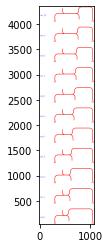

In [222]:
# import string
letters = string.ascii_uppercase
gap = 0.085
ring_gap = 0.07
coupling_len = 11 
te0_wg_width = 0.39
te2_wg_width = 1.2
coupling_len_sweep = [14]
ring_coupling_len_sweep1 = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
# coupling_len_sweep = [14, 16, 18]
# ring_coupling_len_sweep1 = [20, 30]
layout_name = 'SOS_layout_dc'
layout = GridLayout(title='', frame_layer=0, text_layer=3, region_layer_type=None,
                        horizontal_spacing= 0, vertical_spacing=0)
for i in range(len(ring_coupling_len_sweep1)):
    layout.begin_new_row('row_' + str(i))
    for j in range(len(coupling_len_sweep)):
        cell_name = str(j) + letters[i]
        ring_coupling_len = ring_coupling_len_sweep1[i]
        coupling_len = coupling_len_sweep[j]
        
        cell, ring_center, ring_total = te0_te0_directional_coupler_straight(start_x=0, start_y=0, cell=cell, coupler_params=coupler1_params,
                       gap=gap, coupling_len=coupling_len, te0_wg_width=te0_wg_width, te2_wg_width=te2_wg_width, ring_coupling_len=ring_coupling_len, ring_gap=ring_gap,
                       inversion=False, cell_name=cell_name)
        layout.add_to_row(cell)
        
layout_cell, mapping = layout.generate_layout()
layout_cell.show()


In [224]:
layout_cell.save('IDT_library_GDS/racetrack_coupling_ref.gds', grid_steps_per_micron=1000, parallel=True)